### 1) EXACT APPROACH: BRANCH-AND-BOUND $^{3}$

In [40]:
from ortools.algorithms import pywrapknapsack_solver

In [41]:
values = [
    360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
    78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
    87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
    312
]
weights = [[
    7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
    42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
    3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
]]
capacities = [850]

In [42]:
solver = pywrapknapsack_solver.KnapsackSolver(
    pywrapknapsack_solver.KnapsackSolver.
    KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'KnapsackExample')

solver.Init(values, weights, capacities)
computed_value = solver.Solve()

In [43]:
packed_weights = []
total_weight = 0

for i in range(len(values)):
    if solver.BestSolutionContains(i):
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]

In [46]:
print('computed_value:', computed_value)
print('total_weight:', total_weight)
print('packed_weights:', packed_weights)

computed_value: 7534
total_weight: 850
packed_weights: [7, 0, 22, 80, 11, 59, 18, 0, 3, 8, 15, 42, 9, 0, 47, 52, 26, 6, 29, 84, 2, 4, 18, 7, 71, 3, 66, 31, 0, 65, 52, 13]


### 2) SIMPLE ROBUST OPTIMIZATION

In [114]:
import cvxpy as cp

In [115]:
computed_value_ro_simple = []
total_weight_ro_simple = []
for idx in range(N):
    x1 = cp.Variable(N, boolean=True, integer=True)
    obj1 = values_ro.T @ x1 
    w1 = weights_ro + zs[idx] * delta
    opt1 = cp.Problem(
        cp.Maximize(values_ro.T @ x1), 
        [
            weights_ro.T @ x1 <= capacities_ro,
            w1.T @ x1 <= capacities_ro, 
            cp.norm(zs[idx] * x1, 1) <= 1,
            cp.abs(zs[idx] * x1) <= 1
        ])
    opt1.solve(solver='ECOS_BB')
    computed_value_ro_simple.append((x1.value.round().astype(int) * values_ro).sum())
    total_weight_ro_simple.append((x1.value.round().astype(int) * weights_ro).sum())

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 30 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 52 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 70 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 90 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 

/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 108 times so far.

  warnings.warn(msg, UserWarning)
/Users/novialistiyaniwirha/codes/ro-tutorial/venv/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit

In [121]:
print(computed_value_ro_simple)
print(total_weight_ro_simple)
print((x1.value.round().astype(int) * weights_ro)) # last iter is the result of worst case analysis

[7534, 7444, 7466, 7534, 7397, 7469, 7525, 7526, 7480, 7517, 7526, 7484, 7496, 7435, 7470, 7513, 7387, 7504, 7384, 7335, 7467, 7526, 7515, 7512, 7534, 7183, 7406, 7484, 7387, 7534, 7526, 7534, 7512, 7534, 7512, 7350, 7475, 7515, 7517, 7438, 7465, 7456, 7388, 7513, 7517, 7534, 7534, 7423, 7473, 7484]
[850, 846, 840, 850, 822, 850, 845, 848, 850, 845, 848, 821, 850, 836, 845, 850, 847, 840, 839, 850, 850, 848, 847, 837, 850, 840, 850, 821, 834, 850, 848, 850, 837, 850, 837, 846, 839, 847, 845, 849, 848, 838, 848, 850, 850, 850, 850, 841, 846, 821]
[ 7  0  0 22 80  0 11  0  0  0 59 18  0  0  3  8 15 42  9  0  0 47 52  0
 26  0  0  6  0 84  2  4 18  0  7  0  0  0 71  3  0 66 31  0  0  0  0 65
 52 13]


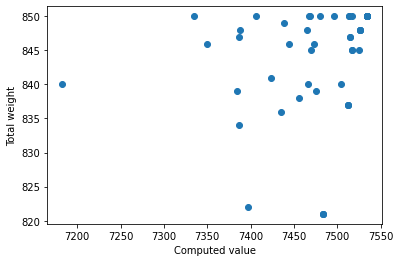

In [120]:
plt.scatter(computed_value_ro_simple, total_weight_ro_simple)
plt.xlabel('Computed value')
plt.ylabel('Total weight')
plt.show()

### 3) ROBUST OPTIMIZATION $^{4}$

In [36]:
import pandas as pd
from rsome import ro
from rsome import ort_solver as ort
import rsome as rso
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [7]:
N = len(values)
capacities_ro = capacities[0]

values_ro = np.array(values)
weights_ro = np.array(weights[0])
delta = 0.2 * weights_ro

In [8]:
def robust(r):
    """
    The function robust implements the robust optimiztion model,
    given the budget of uncertainty r
    """

    model = ro.Model('robust')
    x = model.dvar(N, vtype='B')    
    z = model.rvar(N)              

    z_set = (abs(z) <= 1, rso.norm(z, 1) <= r)
    model.max(values_ro @ x)
    model.st(((weights_ro + z * delta) @ x <= capacities_ro).forall(z_set))

    model.solve(ort, display=False)

    return model.get(), x.get()     # the optimal objective and solution

In [11]:
def sim(x_sol, zs):
    """
    The function sim is for calculating the probability of violation
    via simulations.
        x_sol: solution of the Knapsack problem
        zs: random sample of the random variable z
    """

    weights_sample_ro = weights_ro + zs*delta   # random samples of uncertain weights

    return (weights_sample_ro @ x_sol > capacities_ro).mean()

In [34]:
step = 0.1
rs = np.arange(0, 5+step, step)         # all budgets of uncertainty
num_samp = 20000
zs = 1-2*rd.rand(num_samp, N)           # random samples for z

"""Robust optimization"""
outputs_rb = [robust(r) for r in rs]
computed_value_ro = [output[0] for output in outputs_rb]      
total_weight_ro = [(output[1] * weights_ro).sum() for output in outputs_rb]
prob_violation_ro = [sim(output[1], zs) for output in outputs_rb]

In [50]:
# compare result with no uncertainty budget (should be similar to previous approach)
# packed_weights from previous approach - only the one considered as part of solution: 
# [7, 0, 22, 80, 11, 59, 18, 0, 3, 8, 15, 42, 9, 0, 47, 52, 26, 6, 29, 84, 2, 4, 18, 7, 71, 3, 66, 31, 0, 65, 52, 13]

print(outputs_rb[0][1] * weights_ro)

[ 7.  0. -0. 22. 80.  0. 11.  0.  0.  0. 59. 18.  0.  0.  3.  8. 15. 42.
  9.  0. -0. 47. 52.  0. 26. -0.  0.  6. 29. 84.  2.  4. 18.  0.  7.  0.
  0.  0. 71.  3.  0. 66. 31.  0.  0.  0.  0. 65. 52. 13.]


In [37]:
df_ro = pd.DataFrame(list(zip(rs, computed_value_ro, total_weight_ro, prob_violation_ro)), 
                     columns =['uncertainty_budget', 'computed_value', 'total_weight', 'probability_violation'])
df_ro

,uncertainty_budget,computed_value,total_weight,probability_violation
0,0.0,7534.0,850.0,0.50235
1,0.1,7526.0,848.0,0.46780
2,0.2,7525.0,845.0,0.41620
3,0.3,7512.0,837.0,0.30345
4,0.4,7512.0,837.0,0.30345
5,0.5,7512.0,837.0,0.30345
6,0.6,7512.0,837.0,0.30345
7,0.7,7512.0,837.0,0.30345
8,0.8,7484.0,821.0,0.11885
9,0.9,7484.0,821.0,0.11885


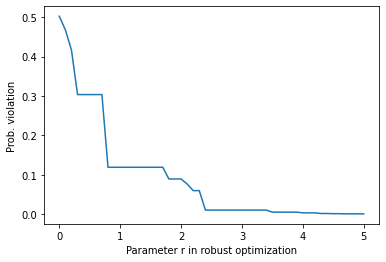

In [83]:
plt.plot(rs, prob_violation_ro)
plt.xlabel('Parameter r in robust optimization')
plt.ylabel('Prob. violation')
plt.show()

### 4) REFERENCES:
1. https://pubsonline.informs.org/doi/abs/10.1287/opre.1030.0065
2. http://www.optimization-online.org/DB_FILE/2021/06/8443.pdf
3. https://developers.google.com/optimization/bin/knapsack
4. https://xiongpengnus.github.io/rsome/example_ro_knapsack